In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Financial Questionnaire (Responses).xlsx")
data[:5]

,Timestamp,Score,Why is a stock valuable?,"Someone makes $30,000 in a year and pays $5,000 in income tax that year. If the next year they make $60,000, how much will they pay in income tax?",Which of the following is the least risky investment,Inflation is:,Which of the following is the riskiest investment strategy?,What is your major?,What is your gender?,"In your opinion, how important is financial literacy?"
0,2016-10-26 21:54:04.548,5,It gives you the right to a portion of a corpo...,"more than $10,000",Treasury bills,An increase in the cost of living,Invest all of your money in one company,IE,Female,7.0
1,2016-10-26 21:54:04.554,4,It gives you the right to a portion of a corpo...,"more than $10,000",Treasury bills,A decrease in the cost of living,Invest all of your money in one company,CPE,Male,9.0
2,2016-10-26 21:55:41.323,3,It gives you the right to a portion of a corpo...,10000,Treasury bills,An increase in stock prices,Invest all of your money in one company,AGB,Toaster,10.0
3,2016-10-26 21:55:43.374,3,It gives you the right to a portion of a corpo...,10000,Corporate bonds,An increase in the cost of living,Invest all of your money in one company,Mechanical Engineering,Female,7.0
4,2016-10-26 21:57:11.405,2,It pays you a fixed amount of money every mont...,10000,Corporate bonds,An increase in the cost of living,Invest all of your money in one company,Grc,Female,6.0


In [3]:
#replace correct answers with True and incorrect ones with False
    
stock_value_grader = lambda resp: resp == "It gives you the right to a portion of a corporation's assets and profits"
income_tax_grader = lambda resp: resp == "more than $10,000"
least_risky_grader = lambda resp: resp == "Treasury bills"
inflation_grader = lambda resp: resp == "An increase in the cost of living"
riskiest_grader = lambda resp: resp == "Invest all of your money in one company"

for (ix, func) in enumerate([stock_value_grader, income_tax_grader, least_risky_grader, inflation_grader, riskiest_grader]):
    data[data.columns[ix + 2]] = data[data.columns[ix + 2]].map(func)

data['Percent Correct'] = data['Score'] * 20.0
    
# make majors lowercase
data["What is your major?"] = data["What is your major?"].map(lambda x: x.lower().strip())


In [4]:
data[:5]

,Timestamp,Score,Why is a stock valuable?,"Someone makes $30,000 in a year and pays $5,000 in income tax that year. If the next year they make $60,000, how much will they pay in income tax?",Which of the following is the least risky investment,Inflation is:,Which of the following is the riskiest investment strategy?,What is your major?,What is your gender?,"In your opinion, how important is financial literacy?",Percent Correct
0,2016-10-26 21:54:04.548,5,True,True,True,True,True,ie,Female,7.0,100.0
1,2016-10-26 21:54:04.554,4,True,True,True,False,True,cpe,Male,9.0,80.0
2,2016-10-26 21:55:41.323,3,True,False,True,False,True,agb,Toaster,10.0,60.0
3,2016-10-26 21:55:43.374,3,True,False,False,True,True,mechanical engineering,Female,7.0,60.0
4,2016-10-26 21:57:11.405,2,False,False,False,True,True,grc,Female,6.0,40.0


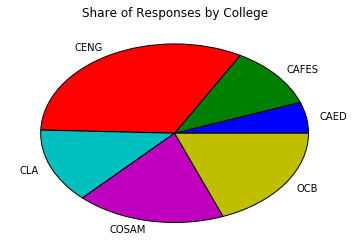

In [5]:
# Map each major to the college it is offered in

ag = "CAFES"      #College of Agriculture, Food and Environmental Sciences
arc = "CAED"      #College of Archetecture and Environmental Design
cosam = "COSAM"   #College of Science and Math
eng = "CENG"      #College of Engineering
lib = "CLA"       #College of Liberal Arts
bus = "OCB"       #Orfalea College of Business

major_to_college = {'ag systems management': ag,
                   'enve': eng,
                   'kinesiology': cosam,
                   'electrical engineering': eng,
                    'civil '
                   'ee': eng,
                   'computer science': eng,
                   'business': bus,
                    'business ': bus,
                   'biology': cosam,
                    'bio': cosam,
                    'econ': bus,
                    'statistics': cosam,
                    'eim': ag,
                    'environmental engineering': eng,
                    'finance': bus,
                    'chem': cosam,
                    'sociology': lib,
                    'cpe': eng,
                    'business administration': bus,
                    'envm': ag,
                    'food science': ag,
                    'ie': eng,
                    'biomedical engineering': eng,
                    'computer engineering': eng,
                    'industrial engineering': eng,
                    'mechanical engineering': eng,
                    'aerospace engineering': eng,
                    'me': eng,
                    'bmed': eng,
                    'art and design': lib,
                    'agb': ag,
                    'liberal studies': cosam,
                    'philosophy': lib,
                    'aerospace': eng,
                    'animal science': ag,
                    'mechanical enginner': eng,
                    'nutrition': ag,
                    'agribusiness': ag,
                    'agricultural business': ag,
                    'graphic communications': lib,
                    'physics': cosam,
                    'aero': eng,
                    'archetectural engineering': arc,
                    'laes': lib,
                    'ee': eng,
                    'cs': eng,
                    'economics': bus,
                    'journalism': lib,
                    'english': lib,
                    'grc': lib,
                    'architecture': arc,
                    'civil engineering': eng,
                    'architectural engineering': arc,
                    'biology/psychology': np.NAN,
                    'https://www.youtube.com/watch?v=dqw4w9wgxcq': np.NAN,
                    '✋🏻❓❗️❓what ❓ the fuck😡😠😡😠': np.NAN
                   }


data["College"] = data["What is your major?"].replace(major_to_college)

# plot number of responses from each major
ax = data.groupby('College')['College'].count().plot('pie')
ax.set_ylabel('')
ax.set_title('Share of Responses by College')


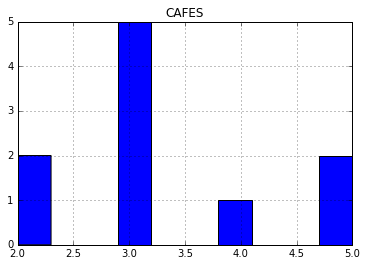

In [6]:
ax = data[data["College"] == ag]['Score'].hist()
ax.set_title(ag)

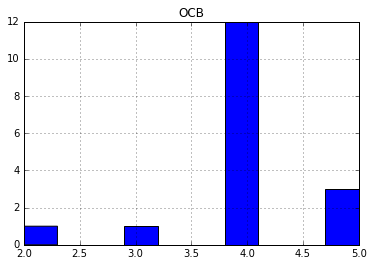

In [7]:
ax = data[data["College"] == bus]['Score'].hist()
ax.set_title(bus)

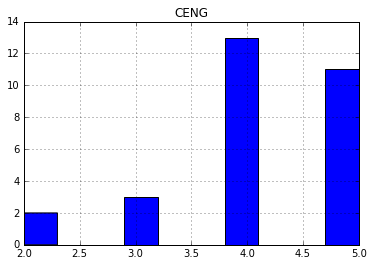

In [8]:
ax = data[data["College"] == eng]['Score'].hist()
ax.set_title(eng)

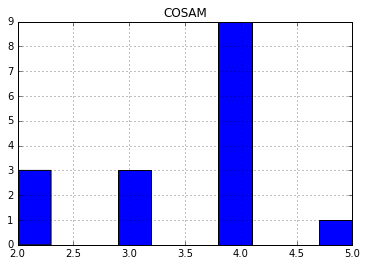

In [9]:
ax = data[data["College"] == cosam]['Score'].hist()
ax.set_title(cosam)

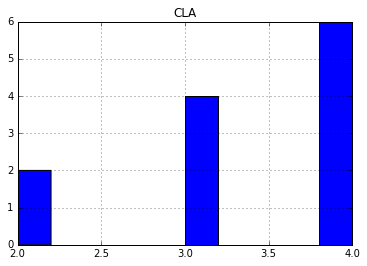

In [10]:
ax = data[data["College"] == lib]['Score'].hist()
ax.set_title(lib)

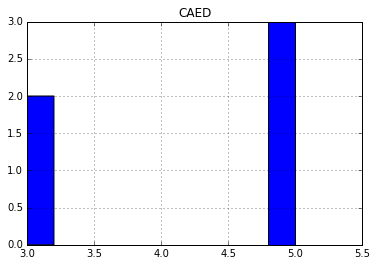

In [11]:
ax = data[data["College"] == arc]['Score'].hist()
ax.set_title(arc)

In [12]:
data.groupby('College')['Score'].mean()

College
CAED     4.200000
CAFES    3.300000
CENG     4.137931
CLA      3.333333
COSAM    3.500000
OCB      4.000000
Name: Score, dtype: float64

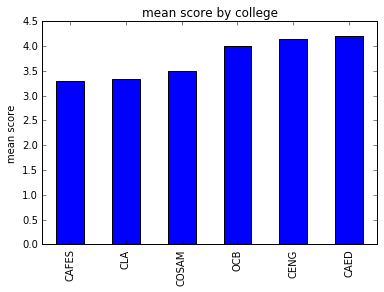

In [13]:
ax = data.groupby("College")['Score'].mean().sort_values().plot('bar')
ax.set_xlabel('')
ax.set_ylabel('mean score')
ax.set_title('mean score by college')

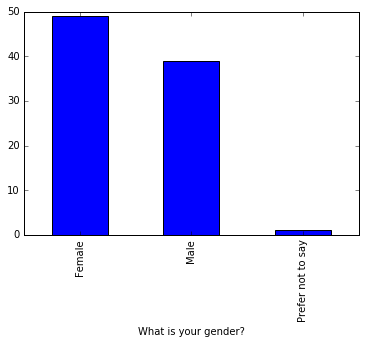

In [14]:
def gender_filter(resp):
    if resp == 'Male' or resp == 'Female' or resp == 'Prefer not to say': 
        return resp 
    else:
        return np.NAN

data['What is your gender?'] = data['What is your gender?'].map(gender_filter)

ax = data.groupby('What is your gender?')['What is your gender?'].count().plot('bar')

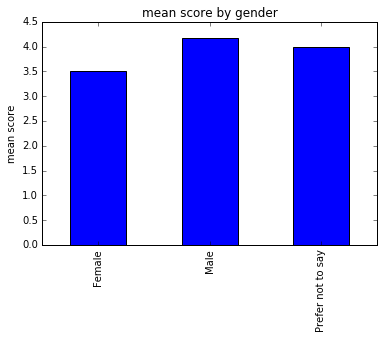

In [15]:
ax = data.groupby("What is your gender?")['Score'].mean().plot('bar')
ax.set_xlabel('')
ax.set_ylabel('mean score')
ax.set_title('mean score by gender')

In [16]:
gender_ratios = pd.crosstab(data["College"], data["What is your gender?"])
gender_ratios

What is your gender?,Female,Male,Prefer not to say
College,,,
CAED,4,1,0
CAFES,7,2,0
CENG,12,17,0
CLA,10,1,1
COSAM,10,6,0
OCB,5,12,0


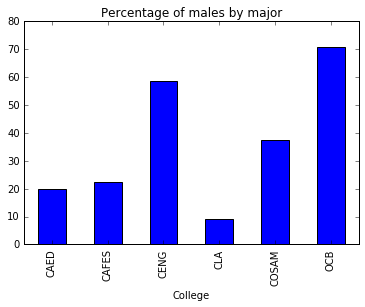

In [17]:
gender_ratios['Male to Female percentage'] = gender_ratios['Male']/(gender_ratios['Female'] + gender_ratios['Male']) * 100
ax = gender_ratios['Male to Female percentage'].plot('bar')
ax.set_title('Percentage of males by major')


In [18]:
data.groupby('What is your gender?')['In your opinion, how important is financial literacy?'].mean()

What is your gender?
Female               8.346939
Male                 8.615385
Prefer not to say    7.000000
Name: In your opinion, how important is financial literacy?, dtype: float64

In [19]:
data.groupby("What is your gender?")['Score'].mean()

What is your gender?
Female               3.510204
Male                 4.179487
Prefer not to say    4.000000
Name: Score, dtype: float64

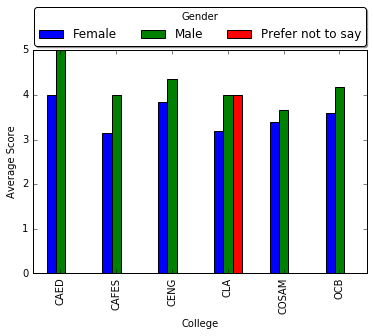

In [20]:
ax = data.groupby(['College', 'What is your gender?'])['Score'].mean().unstack().plot(kind='bar')
ax.set_xlabel('College')
ax.set_ylabel('Average Score')
ax.legend(loc='upper center', bbox_to_anchor = (0.5, 1.22),ncol=3, fancybox=True, shadow=True, title = "Gender")